In [1]:
from pyspectral.config import DATA_DIR
import numpy as np
import json, random
import matplotlib.pyplot as plt
from pathlib import Path
import importlib

SEED = 42
random.seed(SEED); np.random.seed(SEED)

try:
    import torch
    torch.manual_seed(SEED)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(SEED)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
except Exception:
    torch = None

In [2]:
text_path = DATA_DIR / "raw" / "s80-64p.txt"
text_path_proc = DATA_DIR / "processed" / "s80-64p-processed.txt"
def read_data(text_path):
    with text_path.open("r") as f:
        wl = np.fromstring(next(line for line in f if line.strip()), sep="\t")
        rows = [np.fromstring(r_line, sep="\t") for r_line in f if r_line.strip()]
    xy_and_spectra = np.vstack(rows)
    return xy_and_spectra 
raw_data = read_data(text_path)
proc_data = read_data(text_path_proc)
raw_data[:, 2:].shape, proc_data[:, 2:].shape

((64, 950), (64, 950))

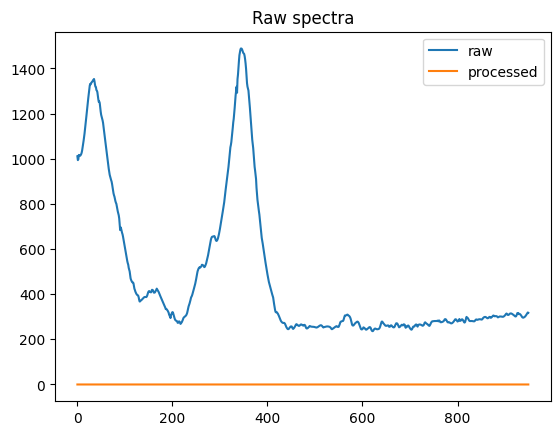

In [3]:
spectra_raw = raw_data[:, 2:]
spectra_proc = proc_data[:, 2:]

plt.plot(spectra_raw[0], label="raw") 
plt.plot(spectra_proc[1], label="processed") 
plt.legend(); plt.title("Raw spectra"); plt.show()

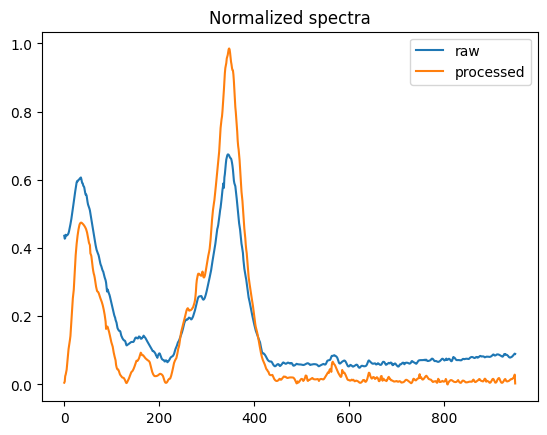

In [4]:
def normalize(data):
    min = np.min(data)
    num = data - min
    den = np.max(data) - min
    return num / den
spectra_raw_m = normalize(raw_data[:, 2:])
spectra_proc_m = normalize(proc_data[:, 2:])

plt.plot(spectra_raw_m[0], label="raw") 
plt.plot(spectra_proc_m[1], label="processed") 
plt.legend(); plt.title("Normalized spectra"); plt.show()